# Der, die, das game

One of the most difficult aspects of German is to clearly remember the gender of nouns. There is no clear rule with which a learner can assign gender to nouns. In the end, it mostly boils down to learning by heart all the nouns with their corresponding gender. This is my own attempt at makings things a bit easier. 

This short program is aim to test students how well their "der, die, das" is going. In the end, it provides users with a set of graphs so they can track their progress. Note, also, that students are free to extend the list presented here. I found the original list [here](http://www.byki.com/lists/german/greg%27s-german-nouns-part-1.html) and scrape it and put it in `csv` format. 

In [1]:
import pandas as pd
import random
import datetime
import os.path
import time

class Gender_guess:
    """"Implements the main game. A word in German is chosen and the user is asked for the gender."""
    
    def __init__(self, csvfile):
        """Takes csv values that contains nouns and generates a pandas data frame to collect results."""
        self.noun_list = csvfile
        self.data_base = pd.DataFrame(index=range(0),
                                      columns=['date', 'time', 'input','article', 'wort', 'word', 'correct'])
        
    def file_to_data_frame(self, csvfile):
        """Passes csv file with Vocabulary to pandas data frame."""
        data_nouns = pd.read_csv('final_data.csv', delimiter= ",", index_col=0)
        return data_nouns
    
    def pick_word(self, data_frame):
        """Randomly pick an index to select word to be tested."""
        random_pick = random.randint(0, len(data_frame.index) -1)
        return random_pick

    def eng_ger_word(self, random_pick, data_frame):
        """Select the words in German and English according to the random selection."""
        german = data_frame.ix[random_pick]["Wort"]
        english = data_frame.ix[random_pick]["Word"]
        return german, english
    
    def print_words(self, german, english):
        """Prints the set of instructions and words for the user."""
        german_size = len(german) + 6
        english_size = len(english) + 6
        print("German".center(german_size) + "||" + "English".center(english_size))
        print("="*(german_size + english_size+2))
        print(german.center(german_size+1)  +  english.center(english_size+1)+"\n\n")
 
    def take_input(self):
        """Takes input of user. Prechecks input values."""
        gender = input("Der, die oder das? ... \n\n").lower()
        while gender not in ["der", "die", "das"]:
            print("\n\nPlease, make sure to enter a valid gender.")
            gender = input("Der, die oder das? ... \n\n").lower()
        return gender
    
    def print_input(self, gender_input, german_word): 
        """Prints user's input."""
        print("\n\n{} {}".format(gender_input , german_word))
        
    def word_gender(self, random_pick, data_frame):
        """Chooses the article corresponding to word randomly chosen."""
        german_gen = data_frame.ix[random_pick]["Article"]
        return german_gen.strip()  
    
    def checker(self, german_gender, gender_input):
        """Checks if gender is right."""
        if german_gender == gender_input:
            print("Das stimmt! :)\n\n")
            return True
        else:
            print("Das ist nicht richtig :( --> {} \n\n ".format(german_gender))
            return False
    
    def gen_data_base(self, gender_input, german_gender, german_wort, english_word, correct):
        """Updates previously generated data base with results from tests."""
        to_add = pd.DataFrame({'date': [datetime.date.today().strftime("%d-%m-%Y")], 
                               'time': [datetime.datetime.now().time().strftime("%H:%M:%S")], 
                               'input': [gender_input],'article': [german_gender], 
                               'wort': [german_wort], 'word': [english_word], 'correct': [correct]})
        self.data_base = self.data_base.append(to_add, ignore_index=True)
    
    def run_program(self, number_of_words):
        """Main logic of program. Stores results to a pandas data frame for time series tracking."""
        data = self.file_to_data_frame('nouns_german')
        for round in range(number_of_words):
            ran_pick = self.pick_word(data)
            german = self.eng_ger_word(ran_pick, data)[0]
            english = self.eng_ger_word(ran_pick, data)[1]
            german_gender = self.word_gender(ran_pick, data)
            self.print_words(german, english)
            gender_input = self.take_input()
            self.print_input(gender_input, german)
            correct = self.checker(german_gender, gender_input)
            self.gen_data_base(gender_input, german_gender, german, english, correct)
            time.sleep(1)
        if os.path.isfile("results"):
            previous_data = pd.read_pickle("results")
            previous_data = previous_data.append(self.data_base, ignore_index=True)
            previous_data.to_pickle("results")
        else: 
            self.data_base.to_pickle("results")


In [2]:
prueba_1 = Gender_guess('final_data.csv')

In [362]:
prueba_1.run_program(20)

        German       ||          English           
   Vorschrift, -en        commandment, directive   


Der, die oder das? ... 

die


die Vorschrift, -en
Das stimmt! :)


        German       ||   English    
   Nasenloch, -¨er        nostrils   


Der, die oder das? ... 

das


das Nasenloch, -¨er
Das stimmt! :)


      German      || English  
    Schnabel, -¨       beak   


Der, die oder das? ... 

der


der Schnabel, -¨
Das stimmt! :)


       German       ||       English        
    Kugelstoßen, -       shot put (sport)   


Der, die oder das? ... 

die


die Kugelstoßen, -
Das ist nicht richtig :( --> das 

 
      German      ||    English     
    Aussehen, -X       appearance   


Der, die oder das? ... 

der


der Aussehen, -X
Das ist nicht richtig :( --> das 

 
              German             ||     English      
   Held, -en, die Heldin, -nen        hero, heroin   


Der, die oder das? ... 

das


das Held, -en, die Heldin, -nen
Das ist nicht richtig :( --> der 

 
 

In [232]:
## Graphing
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates

class Graphs:
    """Implements multiple graphs based on the Gender game."""
    def __init__(self, data_base):
        self.data_base = data_base
    
    def overall_results_percent(self):
        """Generates an overall percent right/wrong graph that accumulates all dates."""
        correct = self.data_base["correct"].sum() / len(self.data_base)
        wrong = (self.data_base["correct"]==False).sum() / len(self.data_base)
        results = [correct, wrong]
        outcome = (0.30, 0.50)
        fig, ax = plt.subplots()
        ax.grid(axis="y", zorder=0, color="#9698A1")
        width = 0.15 
        bars = ax.bar(outcome, results, width, zorder=3)
        bars[0].set_color('lightseagreen')
        bars[1].set_color('coral')
        ax.set_xticks((0.375, 0.575))
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.yaxis.set_ticks_position('left')
        ax.xaxis.set_ticks_position('bottom')
        ax.set_xticklabels(('Right','Wrong'))
        fig.suptitle("Percentage Right/Wrong", fontsize=15)
        
    def results_per_gen(self):
        """Overall percentage graph grouped by gender."""
        grouped = (self.data_base["correct"]==True).groupby(self.data_base["article"])
        correct = grouped.mean()
        incorrect = 1 - grouped.mean()
        gender_track = correct.append(incorrect)
        fig, ax = plt.subplots()
        ax.grid(axis="y", zorder=0, color="#9698A1")
        
        ind_x = np.array([0., 0.25])
        ticks = []
        for gender in pd.unique(gender_track.index):
            width = 0.25
            ind_x += 0.75
            bars_gen = ax.bar(ind_x, gender_track[gender], width)
            bars_gen[0].set_color('lightseagreen')
            bars_gen[1].set_color('coral')
            ticks.append((width+ind_x)[0])
            
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.yaxis.set_ticks_position('left')
        ax.xaxis.set_ticks_position('bottom')
        ax.set_xticks(ticks)
        ax.set_xticklabels(('der','die', 'das'))
        fig.suptitle("Percentage Right/Wrong by Gender", fontsize=15)
        
    def results_per_date(self):
        """Overall percentage right/wrong graph grouped by date."""
        grouped = (self.data_base["correct"]==True).groupby(self.data_base["date"])
        correct = grouped.mean()
        wrong = 1 - grouped.mean()
        data_date = correct.append(wrong)
        fig, ax = plt.subplots()  
        x_loc = np.array([0, 0.15])
        ax.grid(axis="y", zorder=0, color="#9698A1")
        ticks = []
        dates_played = []
        for date in pd.unique(data_date.index):
            width = 0.15
            x_loc += 0.75
            bars_date = ax.bar(x_loc, data_date[date], width, zorder=3)
            bars_date[0].set_color('lightseagreen')
            bars_date[1].set_color('coral')
            ticks.append((width+x_loc)[0])
            dates_played.append(datetime.datetime.strptime(date, '%d-%m-%Y' ).strftime("%d %b"))
        
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.yaxis.set_ticks_position('left')
        ax.xaxis.set_ticks_position('bottom')
        ax.set_xticks(ticks)
        ax.set_xticklabels(dates_played)
        fig.suptitle("Right/Wrong by date", fontsize=15)
        ax.set_xlim([ax.get_xlim()[0], ax.get_xlim()[1]+0.15])
        plt.show()
        
    def wrong_rank(self):
        """Graph that presents 12 more common mistaken words with their correct gender."""
        wrong_words = self.data_base[self.data_base["correct"]==False]
        wrong_by_word = wrong_words.groupby(wrong_words["wort"])
         ## "article": Getting the first value of entry
        func = {"correct": "count", "article": lambda x: x.iloc[0]} 
        wrong_by_word =  wrong_by_word.agg(func).rename(columns = {"correct": "wrong"})
        wrong_by_word = wrong_by_word.reset_index()
        wrong_ones_sort = wrong_by_word.sort_values(['wrong', 'wort'], ascending = [0, 0])
        first_twenty_wrong = wrong_ones_sort[0:20]
        col_num = np.arange(first_twenty_wrong.shape[0])
        fig, ax = plt.subplots(figsize=(8, 6))
        width = 0.65
        bars_worng = ax.bar(col_num, first_twenty_wrong["wrong"], width, color= 'powderblue'
                           , linewidth=0.5)
        ax.set_xlim([-0.5, ax.get_xlim()[1]])
        ax.set_ylim([0, ax.get_ylim()[1] +1])
        ax.set_title('Ranking of wrong words', fontsize=15)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.grid(axis="y", zorder=0, color="#9698A1")
        ax.yaxis.set_ticks_position('left')
        ax.xaxis.set_ticks_position('bottom')
        ax.set_yticks(np.arange(first_twenty_wrong.iloc[-1]["wrong"], 
                                first_twenty_wrong.iloc[0]["wrong"]+2, 1.0))
        ax.set_xticks(col_num + 0.325)
        ax.set_xticklabels(list(first_twenty_wrong['wort']))
        plt.setp(ax.get_xticklabels(), rotation=90)
        
        for article in range(len(list(first_twenty_wrong['article']))):
            ax.text(article + 0.4, 0.15 , list(first_twenty_wrong['article'])[article], rotation= 90,
                   horizontalalignment='center',
                verticalalignment='center', fontsize=12)        
        
    def daily_stats(self):
        """Overall right/wrong percent by date"""
        grouped = (self.data_base["correct"]==True).groupby(self.data_base["date"])
        correct = grouped.mean().reset_index()
        correct["wrong"] =  1 - correct["correct"]
        correct["date"] = pd.to_datetime(correct["date"], dayfirst=True)
        correct = correct.sort_values("date")
        fig, ax = plt.subplots()
        #dates = [datetime.datetime.strptime(date, '%d-%m-%Y' ).date() for date in correct["date"] ]
        left_limit = (datetime.datetime.strptime(pd.unique(self.data_base["date"])[0], '%d-%m-%Y' ) - 
                      datetime.timedelta(days= 1)).date() 
        right_limit = (datetime.datetime.strptime(pd.unique(self.data_base["date"])[-1], '%d-%m-%Y' )  
                       + datetime.timedelta(days=1)).date()
        ax.plot(correct['date'], correct['correct'], marker = '.', color='lightseagreen',
                                           ms = 15, lw = 2, linestyle= '-' , label="correct" )
        ax.plot(correct['date'], correct['wrong'], color='coral', marker = '.',
                                           ms = 15, lw = 2, linestyle= '-', label="wrong"  )
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.yaxis.set_ticks_position('left')
        ax.xaxis.set_ticks_position('bottom')
        ax.grid(axis="y", zorder=0, color="#9698A1")
        ax.set_xticks((correct['date'].values))
        ax.set_xlim([left_limit, right_limit])
        ax.set_ylim([0., 1.])
        ax.legend(loc='upper right').get_frame().set_alpha(0.3)
        ax.set_title('Daily Stats', fontsize=15)
        ax.set_xticklabels(correct['date'].map(lambda x: x.strftime("%d %b")))
        ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%d \n %b'))

    def daily_stats_per_gender(self):
        """Overall right/wrong percent by date and gender"""
        grouped = (self.data_base["correct"]==True).groupby(
            [self.data_base["date"], self.data_base["article"]])
        correct_gender = grouped.mean().reset_index()
        correct_gender["wrong"] = 1 - correct_gender["correct"] 
        correct_gender = correct_gender.set_index(["date", "article"]).unstack().reset_index()
        correct_gender["date"] = pd.to_datetime(correct_gender["date"], dayfirst=True)
        correct_gender = correct_gender.sort_values("date")
        left_limit = (datetime.datetime.strptime(pd.unique(self.data_base["date"])[0], '%d-%m-%Y' )  - 
                      datetime.timedelta(days= 1)).date() 
        right_limit = (datetime.datetime.strptime(pd.unique(self.data_base["date"])[-1], '%d-%m-%Y' )  
                       + datetime.timedelta(days=1)).date()
        fig= plt.figure()
        ax = fig.add_axes([0.1, 0.2, 0.85, 0.70])
        lab_desc, lab_chars = [], []
        gen_spec = {"der":"#6191C5" , "die":"#D56054" , "das": "#69B17D"}
        for gender, color_gen in gen_spec.items():
            ax.plot(correct_gender["date"], correct_gender["correct"][gender], color= color_gen, marker = '.', 
                    ms = 12, lw = 2, linestyle= '-' )
            ax.plot(correct_gender["date"], correct_gender["wrong"][gender], color= color_gen, marker = '.', 
                    ms = 12, lw = 2, linestyle= '--')
            leg_char_corr = plt.Line2D((0,1),(0,0), color=color_gen, marker='.', linestyle='-')
            leg_char_wrong = plt.Line2D((0,1),(0,0), color=color_gen, marker='.', linestyle='--')
            lab_chars.extend([leg_char_corr, leg_char_wrong])
            lab_desc.extend([gender + " right", gender + " wrong"])
        
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.yaxis.set_ticks_position('left')
        ax.xaxis.set_ticks_position('bottom')
        ax.grid(axis="y", zorder=0, color="#9698A1")
        ax.set_xticks((correct_gender['date'].values))
        ax.set_xlim([left_limit, right_limit])
        ax.set_ylim([0., 1.1])
        ax.set_title('Daily Stats per gender', fontsize=15)
        ax.set_xticklabels(correct_gender['date'].map(lambda x: x.strftime("%d %b")))
        ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%d \n %b'))
        ax.legend(lab_chars, lab_desc, loc='upper center', 
                  bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=3)
        

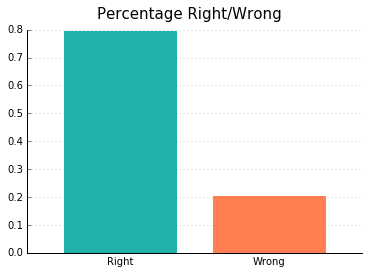

In [233]:
graph_test = Graphs(pd.read_pickle("game_results"))
graph_test.overall_results_percent()

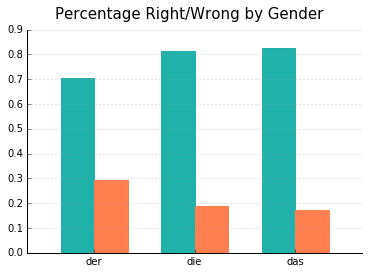

In [234]:
graph_test.results_per_gen()

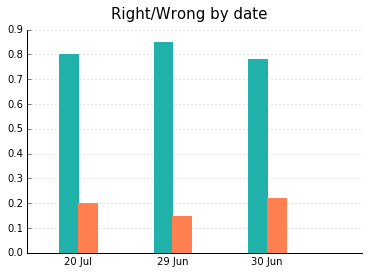

In [235]:
graph_test.results_per_date()

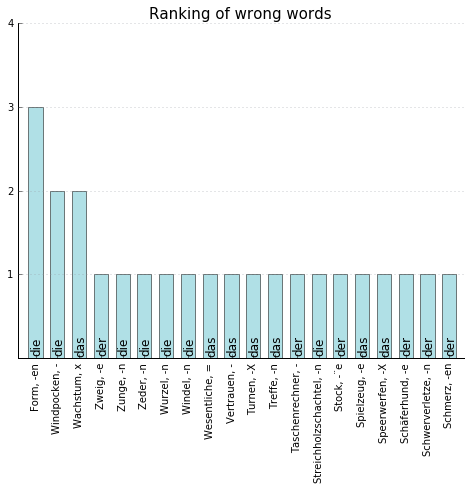

In [236]:
graph_test.wrong_rank()


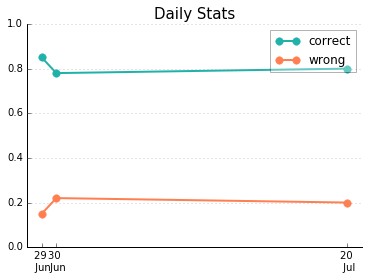

In [237]:
graph_test.daily_stats()

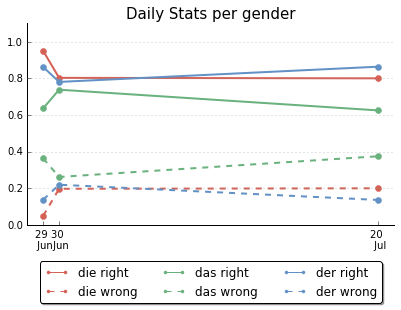

In [238]:
graph_test.daily_stats_per_gender()